# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [ ]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [ ]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( Dense( 3 , input_shape = (nfeatures,), activation = 'softmax') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2, verbose = 0).history

* 학습결과 그래프

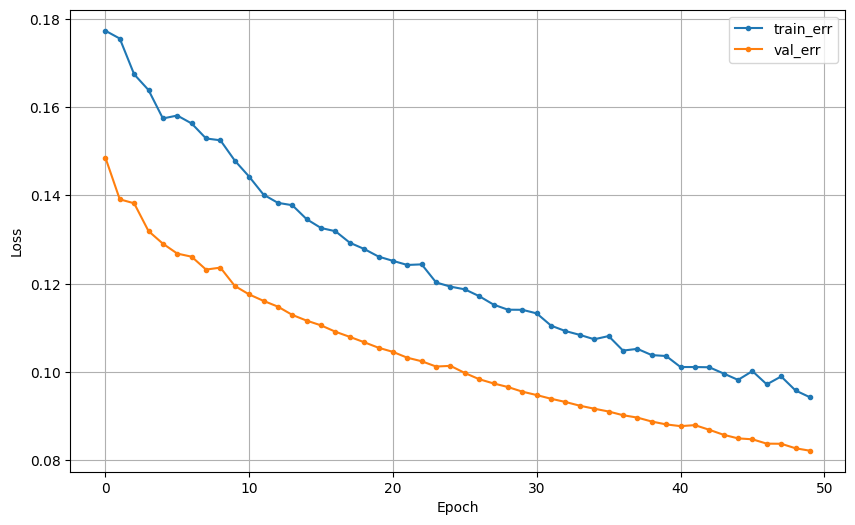

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 5ms/step


array([[9.9940836e-01, 5.9156289e-04, 2.6799356e-09],
       [1.7063925e-04, 9.5219558e-01, 4.7633838e-02],
       [2.0027399e-04, 9.4025934e-01, 5.9540294e-02],
       [2.6611252e-07, 4.1607067e-01, 5.8392906e-01],
       [1.5577257e-03, 9.8901737e-01, 9.4249742e-03]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [ ]:
y_val[:5]

47     0
73     1
74     1
129    2
67     1
Name: Species, dtype: int64

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



----

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8 , input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3 , activation = 'softmax') ])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2, verbose = 0).history

* 학습결과 그래프

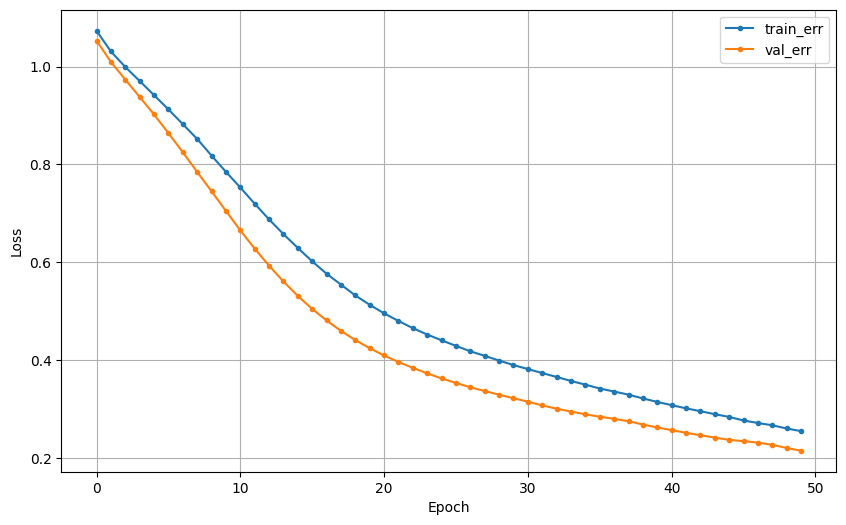

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 17  1]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.94      0.92        18
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
#메모리 정리
clear_session()

#모델 설정
model2 = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(3, activation = 'softmax')]
                    )

#모델 요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model2.compile(optimizer = Adam(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy')
history2 = model2.fit(x_train, y_train, epochs = 50, validation_split = .2, verbose = 0).history

* 학습결과 그래프

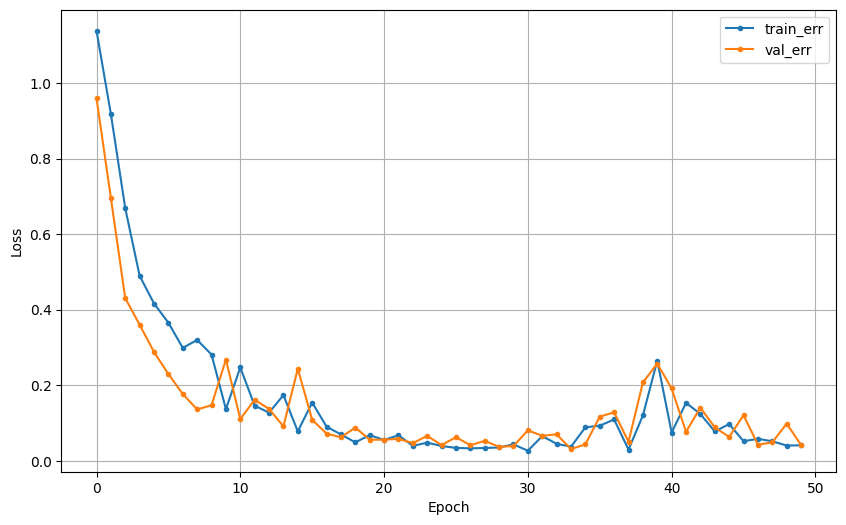

In [ ]:
dl_history_plot(history2)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred2 = model2.predict(x_val)
pred_2 = pred2.argmax(axis=1)

2/2 [==============================] - 0s 7ms/step


In [ ]:
print(confusion_matrix(y_val,pred_2))
print(classification_report(y_val,pred_2))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



### (3) 모델3

* 여러분이 원하는 형태로 설계를 해 봅시다.

In [ ]:
#메모리 정리
clear_session()

#모델
model3 = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                     Dense(16, activation = 'relu'),
                     Dense(3, activation = 'softmax')]
                    )

#모델 요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 235 (940.00 Byte)
Trainable params: 235 (940.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model3.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')
history3 = model.fit(x_train, y_train, epochs =100, validation_split = .2, verbose = 0).history

* 학습결과 그래프

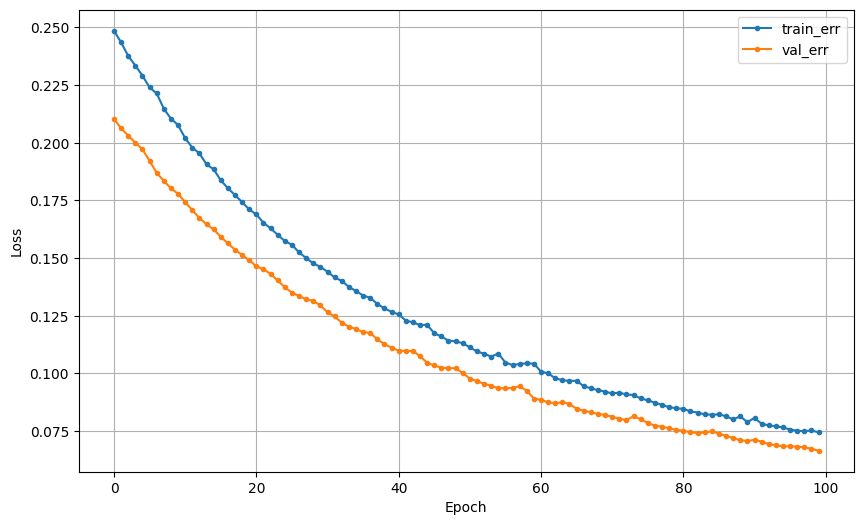

In [ ]:
dl_history_plot(history3)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred3 = model3.predict(x_val)
pred_3 = pred3.argmax(axis = 1)

2/2 [==============================] - 0s 11ms/step


In [ ]:
print(confusion_matrix(y_val,pred_3))
print(classification_report(y_val,pred_3))

[[ 0 13  0]
 [ 4 14  0]
 [ 0 14  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.34      0.78      0.47        18
           2       0.00      0.00      0.00        14

    accuracy                           0.31        45
   macro avg       0.11      0.26      0.16        45
weighted avg       0.14      0.31      0.19        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [ ]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
y_c = to_categorical(y.values, 3)

In [ ]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [ ]:
y_train.shape

(105, 3)

### (3) Scaling

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2,).history

Epoch 1/100
3/3 [==============================] - 1s 91ms/step - loss: 1.0887 - val_loss: 0.9990
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9239 - val_loss: 0.8481
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.8067 - val_loss: 0.7123
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6979 - val_loss: 0.6274
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6466 - val_loss: 0.5697
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5983 - val_loss: 0.5063
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5413 - val_loss: 0.4687
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5121 - val_loss: 0.4407
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4865 - val_loss: 0.4180
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.4742 - val_loss: 0.4040
Epoch 11/100
3/3 [=

* 학습결과 그래프

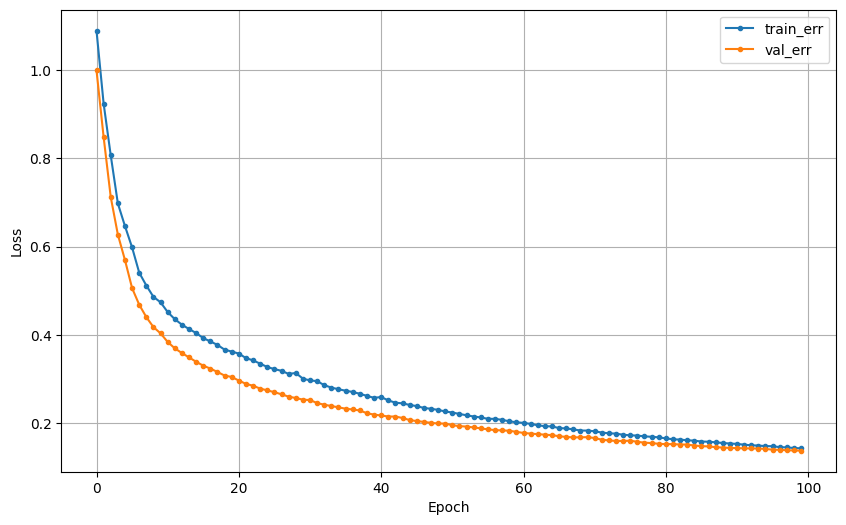

In [ ]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[1.0433726e-05, 5.8769219e-02, 9.4122040e-01],
       [7.1301685e-07, 6.9786362e-02, 9.3021291e-01],
       [9.7155488e-01, 2.8443828e-02, 1.2065174e-06],
       [2.8707655e-04, 3.5075229e-01, 6.4896047e-01],
       [9.8416835e-01, 1.5831232e-02, 3.3947617e-07]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0])

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [ ]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

In [ ]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

